In [133]:
import math

def tax_deferred(principal, rate, time_periods, tax_rate):
    amount = principal * (1.0 + rate) ** time_periods
    return amount - ((amount - principal) * tax_rate)

def tax_prepaid(principal, rate, time_periods, tax_rate):
    amount = (principal * (1.0 - tax_rate)) * (1.0 + rate) ** time_periods
    return amount

args = (1000000.00, 0.10, 30, 0.20)
tax_deferred(*args), tax_prepaid(*args)

(14159521.815109158, 13959521.815109158)

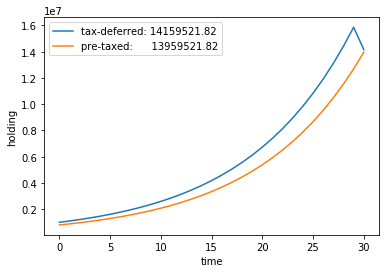

In [130]:
import matplotlib
import matplotlib.pyplot as plt

principal = 1000000.00
time_periods = 30
rate = 0.10
tax_rate = 0.20
t = [1.0 * (i + 1) for i in range(0, time_periods)]

holdings_t = []
holdings_t.append(principal)
for _period in t:
    holdings_t.append(holdings_t[-1] * (1.0 + rate))

holding = holdings_t.pop()
# if the tax on an tax-deferred vehicle is capital gain, this is accurate
holdings_t.append(holding - (holding - principal) * tax_rate)

pre_holdings_t = []
# if the tax on a pre-taxed vehicle is based on the principal, this is accurate
pre_holdings_t.append(principal * (1.0 - tax_rate))
for _period in t:
    pre_holdings_t.append(pre_holdings_t[-1] * (1.0 + rate))

t.insert(0, 0.0)

plt.plot(t, holdings_t, label=f"tax-deferred: {holdings_t[-1]:.2f}")
plt.plot(t, pre_holdings_t, label=f"pre-taxed:      {pre_holdings_t[-1]:.2f}")

plt.ylabel("holding")
plt.xlabel("time")
plt.legend()
plt.show()